# 项目：调查数据集—电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>
<a id='intro'></a>

## 简介

>此次探索的数据集为电影数据集，为Udacity项目3的第一个数据集，数据包含了一些电影的基本信息，包括电影的基本信息、预算、收入、受欢迎度等数据信息，电影基本信息包括电影类型、阵容、播放时长、发行时间、 发行公司、导演等等。
>基于python，对该数据集进行探索，主要使用pandas、numpy以及matplotlib程序包对数据进行整理和探索
此次数据探索包括四个步骤：
1、提出问题
2、数据整理
3、探索数据
4、得出结论

>提出问题：
1、什么会影响电影的收入？
2、什么会影响电影的受欢迎程度


In [28]:
# 导入程序包,加入ipython中的魔术命令，用于在jupter中展示可视化图像
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

In [3]:
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>

## 数据整理

### 常规属性

In [4]:
# 查看数据量
df.shape

(10866, 21)

In [5]:
# 查看数据类型
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# 加载数据并打印几行,看一下数据的大致情况。
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# 丢弃与分析问题无关的列
df.drop(['overview','tagline','homepage','imdb_id','production_companies'],axis=1,inplace=True)

In [8]:
# 处理数据冗余
df = df.drop_duplicates()

In [9]:
# 对数据集进行统计性描述
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>通过上面的统计性描述计算，可以看出变量budget和revenue以及runtime的最小值均为0，说明三个变量里均有0值，而对于电影来说，这三个变量值为0是非正常现象，很有可能为缺失值，而在数据集中记为0，接下来要对这三个变量进行处理。

In [10]:
# 计算budget为0值的数量
df.query('budget == 0').count()['id']

5696

In [11]:
# 计算revenue为0值的数量
df.query('revenue == 0').count()['id']

6016

>可以看到budget和revenue为0值的数据量占据了总数据量的一半以上，因此不能采取删除数据行的方式进行处理，可以通过将0值转化为NaN的方式进行处理

In [12]:
df['budget'] = df['budget'].replace(0,np.NaN)
df['revenue'] = df['revenue'].replace(0,np.NaN)

In [13]:
# 查看空值数量
df.isnull().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
keywords          1493
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [14]:
# 查看runtime为0值的数据量
df.query('runtime == 0').count()['id']

31

>可以看到runtime为0值的数据量并不大，可以通过删除这部分数据而进行处理

In [15]:
df.query('runtime !=0',inplace=True)

>刚刚的空值计算，可以看到cast、director、keywords、以及genres均有空值，接下来对这部分数据进行分析和处理

In [16]:
# 丢弃genres为空的数据
df.dropna(subset=['genres'],how='any',inplace=True)

In [17]:
# 分析cast为何会出现空值
cast_null = df[df['cast'].isnull().values==True]
cast_null.groupby('genres').count()['id']

genres
Action|Adventure|Animation|Family|Fantasy     1
Adventure|Animation                           1
Animation                                     7
Animation|Action                              1
Animation|Comedy                              3
Animation|Comedy|Family                       2
Animation|Comedy|Science Fiction              1
Animation|Drama                               1
Animation|Family                              5
Animation|Family|Fantasy                      1
Animation|Family|Music                        1
Animation|Fantasy                             1
Animation|Fantasy|Mystery                     1
Documentary                                  34
Documentary|Drama|Music                       1
Documentary|Drama|Music|Thriller              1
Documentary|History                           2
Documentary|History|War                       1
Documentary|Thriller                          1
Drama                                         1
Drama|Animation                  

>可以看到cast为空的电影类型多集中在动画片和纪录片，在这两类电影中阵容为空是可以说通的

In [18]:
director_null = df[df['director'].isnull().values==True]
director_null.groupby('genres').count()['id']

genres
Action|Adventure|Animation|Family|Fantasy          1
Action|Adventure|Science Fiction                   1
Action|Comedy                                      1
Animation|Action|Thriller|Science Fiction          1
Animation|Comedy|Family                            1
Animation|Family                                   1
Animation|Family|Fantasy                           1
Animation|Fantasy                                  1
Comedy                                             5
Comedy|Romance                                     1
Documentary                                        6
Documentary|History                                1
Documentary|Science Fiction                        1
Drama                                              1
Drama|Action|Thriller|Crime                        1
Drama|Comedy|Romance|Foreign                       1
Drama|Family|Foreign                               1
Drama|History|Western                              1
Family                                 

>对于director为空的电影类型集中在喜剧、纪录片以及音乐，这也是可以说通的
接下来将空值替换为“ ”

In [19]:
df['cast'] = df['cast'].fillna("")
df['director'] = df['director'].fillna("")
df.isnull().sum()

id                   0
popularity           0
budget            5647
revenue           5963
original_title       0
cast                 0
director             0
keywords          1460
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

>而对于keywords可以后续再进行处理

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 16 columns):
id                10812 non-null int64
popularity        10812 non-null float64
budget            5165 non-null float64
revenue           4849 non-null float64
original_title    10812 non-null object
cast              10812 non-null object
director          10812 non-null object
keywords          9352 non-null object
runtime           10812 non-null int64
genres            10812 non-null object
release_date      10812 non-null object
vote_count        10812 non-null int64
vote_average      10812 non-null float64
release_year      10812 non-null int64
budget_adj        10812 non-null float64
revenue_adj       10812 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.4+ MB


In [21]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>

## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 （电影的受欢迎度popularity与什么有关？ ）

>先看电影的热度和时间的关系

In [22]:
# 按照时间进行分组，计算热度平均值
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

In [23]:
# 按照时间进行分组，计算热度中位值
p_median = df.groupby('release_year').median()['popularity']
p_median.head()

release_year
1960    0.268273
1961    0.265092
1962    0.299075
1963    0.249940
1964    0.194472
Name: popularity, dtype: float64

Text(0, 0.5, 'Popolarity')

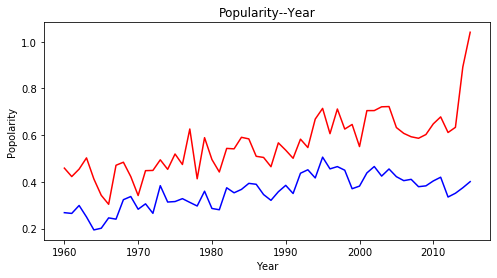

In [30]:
# 绘制折线图
index_mean = p_mean.index
index_median = p_median.index
x1,y1 = index_mean,p_mean
x2,y2 = index_median,p_median
plt.figure(figsize=(8,4))
plt.plot(x1,y1, color='r', label='mean')
plt.plot(x2,y2, color='b', label='median')
plt.title('Popularity--Year')
plt.xlabel('Year')
plt.ylabel('Popolarity')

>可以看到，随着时间的推进，电影热度也在逐步上升，在大约2005年的时候，两个值均达到较高的状态。伴随着网络时代的发展，人们有越来越多的渠道接触到电影，因此会出现上图中的趋势。
>接下来着重研究与电影热度相关的因素
>定量分析包括budget(预算）、runtime(影片时长)，定性分析包括cast(阵容）、director(导演)、genres(电影类型)、keywords(关键字)

In [48]:
# popularity and budget
# 首先创建一个函数，方便进行后续研究时将预算和票房收入都进行分组
def cut_by_quantile(dfname,column_name):
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
    bin_names = ['low','medium','higher','highest']
    
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    
    return dfname

In [52]:
# 选取最近的五年时间分析电影热度和预算的关系,并按预算值进行分组
df_year =[2011,2012,2013,2014,2015]
df_b1 = pd.DataFrame()
for year in df_year:
    dfb = df.query('release_year == "%s"' % year) 
    dfb2 = cut_by_quantile(dfb,'budget') 
    df_b1 = df_b1.append(dfb2)
df_b1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
3371,161337,8.411577,NaN,NaN,Underworld: Endless War,Trevor Devall|Brian Dobson|Paul Dobson|Laura H...,Juno John Lee,paris|france|vampire|night|woman with gun,18,Action|Animation|Horror,10/19/11,21,5.9,2011,0.000000e+00,0.000000e+00,NaN
3372,1771,7.959228,140000000.0,3.705698e+08,Captain America: The First Avenger,Chris Evans|Hugo Weaving|Tommy Lee Jones|Hayle...,Joe Johnston,new york|usa|world war ii|nazis|marvel comic,124,Action|Adventure|Science Fiction,7/22/11,5025,6.5,2011,1.357157e+08,3.592296e+08,highest
3373,64690,5.903353,15000000.0,7.617517e+07,Drive,Ryan Gosling|Carey Mulligan|Christina Hendrick...,Nicolas Winding Refn,drowning|stuntman|blood splatter|extreme viole...,100,Drama|Action|Thriller|Crime,1/10/11,2347,7.3,2011,1.454097e+07,7.384406e+07,medium
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,highest
3375,1865,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136,Adventure|Action|Fantasy,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08,highest


In [53]:
df_b1_mean = df_b1.groupby(['release_year','budget_levels']).mean()
df_b1_mean.head()

id  popularity        budget  \
release_year budget_levels                                            
2011         low             69672.640000    0.389272  1.858467e+06   
             medium          65186.250000    0.725426  1.070689e+07   
             higher          61816.569444    1.053384  2.920278e+07   
             highest         53092.857143    1.810899  9.600159e+07   
2012         low            107710.610169    0.348708  1.738289e+06   

                                 revenue     runtime   vote_count  \
release_year budget_levels                                          
2011         low            1.166778e+07   89.093333    65.226667   
             medium         2.655956e+07  102.132353   179.691176   
             higher         7.307240e+07  112.388889   456.555556   
             highest        2.790471e+08  111.650794  1185.523810   
2012         low            1.435008e+07   93.644068    72.983051   

                            vote_average    budget_adj   revenue_adj  
release_year budget_levels                                            
2011         low                5.744000  1.801594e+06  4.675097e+06  
             medium             5.825000  1.037924e+07  1.628105e+07  
             higher             6.122222  2.830912e+07  6.198171e+07  
             highest            6.019048  9.306375e+07  2.662140e+08  
2012         low                5.488136  1.650930e+06  4.850966e+06

In [54]:
df_b1_median = df_b1.groupby(['release_year','budget_levels']).median()
df_b1_median.head()

id  popularity      budget      revenue  \
release_year budget_levels                                                  
2011         low             68472.0    0.352084   1000000.0    1000000.0   
             medium          65170.0    0.562866  10000000.0   10654385.0   
             higher          54389.5    0.880534  30000000.0   60965854.0   
             highest         49520.0    1.469090  79000000.0  180769301.0   
2012         low            103269.0    0.268590   1800000.0    3325038.0   

                            runtime  vote_count  vote_average    budget_adj  \
release_year budget_levels                                                    
2011         low               90.0        31.0          5.90  9.693980e+05   
             medium           100.0        77.0          5.80  9.693980e+06   
             higher           108.0       287.5          6.15  2.908194e+07   
             highest          110.0       852.0          5.90  7.658245e+07   
2012         low               92.0        25.0          5.40  1.709540e+06   

                             revenue_adj  
release_year budget_levels                
2011         low            0.000000e+00  
             medium         8.923071e+05  
             higher         5.054657e+07  
             highest        1.721504e+08  
2012         low            0.000000e+00

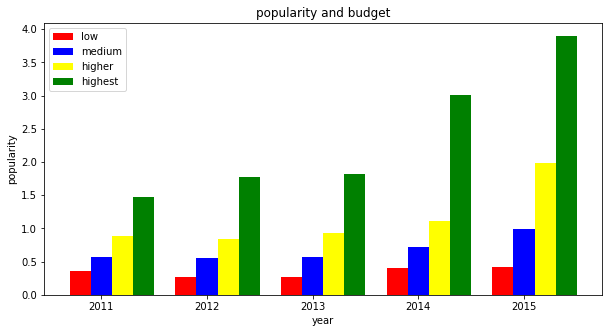

In [67]:
# 绘制柱形图(中位数)
n = len(df_b1_median.query('budget_levels == "low"'))
width = 0.2
index = np.arange(n)
plt.figure(figsize=(10,5))
plt.bar(index,df_b1_median.query('budget_levels == "low"')['popularity'],width,color='red',label='low')
plt.bar(index+width,df_b1_median.query('budget_levels == "medium"')['popularity'],width,color='blue',label='medium')
plt.bar(index+2*width,df_b1_median.query('budget_levels == "higher"')['popularity'],width,color='yellow',label='higher')
plt.bar(index+3*width,df_b1_median.query('budget_levels == "highest"')['popularity'],width,color='green',label='highest')
plt.ylabel('popularity')
plt.xlabel('year')
plt.title('popularity and budget')
plt.xticks(index+width,(2011,2012,2013,2014,2015))
plt.legend()

>通过上图可以看出，看到电影热度和预算有着正相关关系，电影发行方为了电影的热度上升，会增加预算在营销、电影制作很多方面，电影热度会上升。

In [71]:
# popularity and runtime
# 与上述步骤相同，先进行分组，分为short,medium,longer,longest
df_r1 = pd.DataFrame() 
dfr2 = cut_by_quantile(df,'runtime') 
df_r1 = df_r1.append(dfr2)
df_r1.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,highest
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,highest
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,highest
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,highest
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,highest


In [73]:
df_r1_mean = df_r1.groupby(['runtime_levels']).mean()
df_r1_mean.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
runtime_levels,,,,,,,,,,
low,89278.305451,0.412103,1.728293e+07,5.281457e+07,78.555708,84.394926,5.756634,2004.120329,6.325143e+06,1.688005e+07
medium,64923.072453,0.549548,2.264162e+07,6.403565e+07,94.887547,145.526792,5.729547,2001.905660,1.221867e+07,3.273646e+07
higher,56706.408702,0.654616,2.933393e+07,6.900272e+07,105.276311,205.819264,6.048196,2000.530309,1.765861e+07,4.600164e+07
highest,48461.982394,1.015416,4.540519e+07,1.408895e+08,134.467136,459.990610,6.403286,1998.216354,3.613191e+07,1.167586e+08


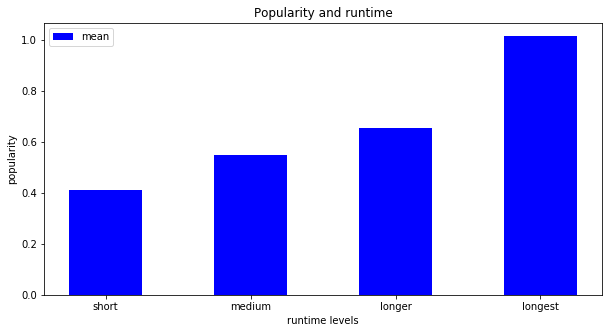

In [77]:
index_r = np.arange(len(df_r1_mean))  
width = 0.5

plt.figure(figsize=(10,5))
plt.bar(index_r, df_r1_mean['popularity'], width, color='b', label='mean')

plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity and runtime')
 
plt.xticks(index_r,('short','medium','longer','longest'))

plt.legend()

>从上图可以看出，时长和电影热度仍成正相关关系，时长越长的电影，电影热度越高。

>接下来定性分析 cast、director、genres、keywords等几个方面，
分析方式为：查看每年热度最高的前100电影，以及每年热度最低的100电影，看这些电影在这四个方面的共通之处

In [83]:
# 每年热度最高的前100电影
df_p_top = df.sort_values(by=['release_year','popularity'],ascending=(True,False))
df_p_top = df_p_top.groupby('release_year').head(100).reset_index(drop=True)
df_p_top.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08,higher
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,10/23/60,224,7.0,1960,1.474593e+07,3.616441e+07,highest
2,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08,highest
3,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,6/15/60,235,7.9,1960,2.211890e+07,1.843242e+08,highest
4,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,10/7/60,15,4.9,1960,0.000000e+00,0.000000e+00,highest


In [84]:
# 每年热度最低的100电影
df_p_low = df.sort_values(by=['release_year','popularity'],ascending=(True,True))
df_p_low = df_p_low.groupby('release_year').head(100).reset_index(drop=True)
df_p_low.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
0,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,12/18/60,13,7.2,1960,2.211890e+07,5.234807e+07,medium
1,39890,0.065808,NaN,NaN,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,9/9/60,13,6.1,1960,0.000000e+00,0.000000e+00,low
2,29756,0.110511,NaN,NaN,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,William Castle,haunted house,85,Horror,8/5/60,12,5.5,1960,0.000000e+00,0.000000e+00,low
3,15788,0.114188,NaN,10000000.0,The Bellboy,Jerry Lewis|Alex Gerry|Bob Clayton|Sonnie Sand...,Jerry Lewis,hotel|gag humor|madcap comedy|bellhop Â,72,Comedy|Family,7/20/60,12,7.0,1960,0.000000e+00,7.372967e+07,low
4,11773,0.127219,200000.0,NaN,Village of the Damned,George Sanders|Barbara Shelley|Martin Stephens...,Wolf Rilla,suicide|england|based on novel|parents kids re...,77,Horror|Science Fiction,7/1/60,28,7.0,1960,1.474593e+06,0.000000e+00,low


In [87]:
# 对于四个定性分析的变量需要进行词汇分割，因为大部分都包含多个词条
# 创建找到出现频率最高的词的函数
def find_top(df_column,num=5):
    list = df_column.str.cat(sep='|').split('|')
    new = pd.DataFrame({'top' :list})
    top = new['top'].value_counts().head(num)
    return top

In [88]:
a = find_top(df_p_top.cast)
b = find_top(df_p_top.director)
c = find_top(df_p_top.genres)
d = find_top(df_p_top.keywords)

In [92]:
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_genres': c.index, 'popular_keyword': d.index})
df_popular

,popular_cast,popular_director,popular_genres,popular_keyword
0,Robert De Niro,Woody Allen,Drama,based on novel
1,Bruce Willis,Steven Spielberg,Comedy,sex
2,Nicolas Cage,Martin Scorsese,Thriller,dystopia
3,Michael Caine,Clint Eastwood,Action,new york
4,Samuel L. Jackson,Ridley Scott,Adventure,musical


In [94]:
e = find_top(df_p_low.cast)
f = find_top(df_p_low.director)
g = find_top(df_p_low.genres)
h = find_top(df_p_low.keywords)
df_unpopular = pd.DataFrame({'unpopular_cast': e.index, 'unpopular_director': f.index, 'unpopular_genres': g.index, 'unpopular_keyword': h.index})
df_unpopular

,unpopular_cast,unpopular_director,unpopular_genres,unpopular_keyword
0,,,Drama,independent film
1,Clint Eastwood,Woody Allen,Comedy,woman director
2,Michael Caine,Clint Eastwood,Thriller,sex
3,Sean Connery,Martin Scorsese,Action,sport
4,Harvey Keitel,Blake Edwards,Romance,murder


>受欢迎的词条统计
>从上面的结果来看，在大众的认知中，一般较为受欢迎的是喜剧或者动作片，但是根据结果，最受欢迎的类型为Drama，关键词为based on novel,这个可能与平时的认知不大相符，因为不是太了解国外Drama类的电影一般是什么样的，这方面不好评价，但是基于小说改编，可以说很常见，因为有热门小说的书迷基础，改编的电影自然有着较高的热度。
>而主演阵容较为受欢迎的前三名，第一名罗伯特·德尼罗，第二名布鲁斯·威利斯，第三名尼古拉斯·凯奇都是无论国内还是国外都很受有名气并且受欢迎的演员。

>不受欢迎的词条统计
>不受欢迎电影类型仍未Drama，而关键字为独立电影，这种独立电影与电影市场主流的商业电影有着很大的不同，受众也不多，因此电影热度较低也属正常现象

>综上，对次数据集热度方面的探索完毕。

<a id='conclusions'></a>
## 结论

>此次主要选取了一个变量popularity进行深入的探索，主要结论为：
定量分析方面：popularity 与budget、runtime均成正相关关系，预算越高的，电影热度越高；电影时长越长，电影热度越高。但同时也可以说两者是相辅相成的关系。
而对于定性分析方面：计算了热度高、热度低的电影中cast、director、genres以及keywords的关键字出现次数，选取了前5，并做了简要分析，无论是热度高还是热度低，电影类型均为Drama，这个是以我目前本身的电影知识没办法理解的。

>自我反思
1、此次项目只选取了一个popularity一个变量进行探索，由于很多地方不熟练，走了很多弯路，以后会再用这个数据集再进行处理和分析。
2、通过做这个项目，我认识到了自己很多的不足之处，首先拿到一个数据集不知从何下手，翻阅了许多资料才知道要处理一个数据集的哪些方面，还有如何合理地进行处理，根据数据集变量的不同意义要进行不同的处理。
3、不擅于写函数。对于很多重复性的代码，思考了很久才知道应该用函数去实现功能，然后调用函数即可实现，这部分是学习上应该加强的。
4、基础不扎实。之前学习的时候觉得自己很多东西会了，但是真正做项目才知道很多东西根本想不起来，在这个项目基本完成后，我会自行整理一些自己薄弱的地方，供以后进行学习和思考。